# Fundamentals of Physics 12 Edition with python

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Math, Latex
from sympy import symbols, exp, integrate, oo, simplify
import sympy as sp

plt.rcParams['text.usetex'] = True

plt.style.use('seaborn-v0_8')

# CHAPTER 1

----------------------------------------------------------------------------------------


### 14
An electron moving along the x axis has a position given by $ x = 16te^{−t} \ m $, where t is in seconds. How far is the electron from the origin when it momentarily stops?

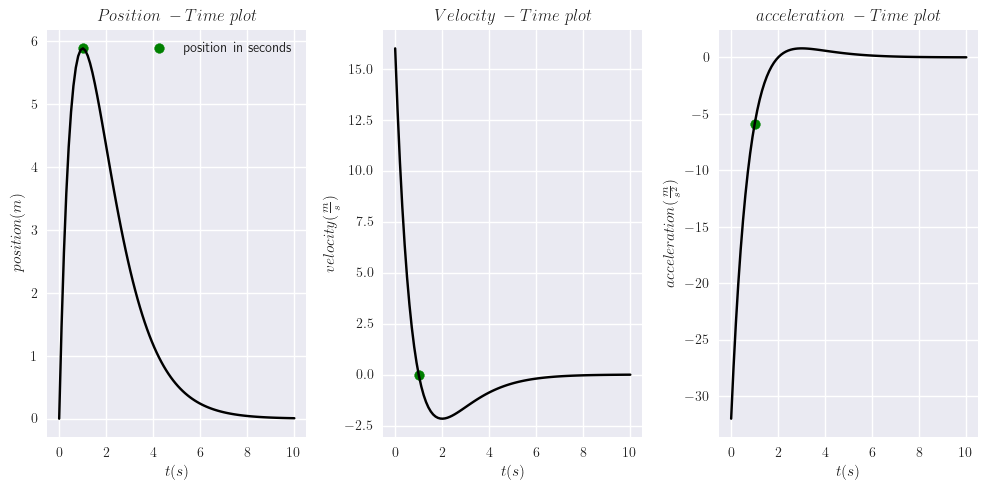

In [120]:
T = np.linspace(0,10,100)
t = sp.symbols('t')

def p(t): return 16*t*sp.exp(-t)
def v(t): return sp.diff(p(t),t)
def a(t): return sp.diff(v(t),t)

p_num = sp.lambdify(t, p(t), 'numpy')
v_num = sp.lambdify(t, v(t), 'numpy')
a_num = sp.lambdify(t, a(t), 'numpy')

t_stop = sp.solve(sp.diff(p(t),t),t)[0]

fig,ax = plt.subplots(1,3,figsize=(10,5))

ax[0].plot(T, p_num(T), color='black')
ax[0].scatter(float(t_stop), p_num(float(t_stop)), color='green', label='position in seconds')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(rf'$ Position \ - Time \ plot $')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(T, v_num(T), color='black')
ax[1].scatter(float(t_stop), v_num(float(t_stop)), color='green', label='position in seconds')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(\frac{m}{s})$')
ax[1].set_title(rf'$ Velocity \ - Time \ plot $')
ax[1].grid(True)

ax[2].plot(T, a_num(T), color='black')
ax[2].scatter(float(t_stop), a_num(float(t_stop)), color='green', label='position in seconds')
ax[2].set_xlabel(r'$t(s)$')
ax[2].set_ylabel(r'$acceleration(\frac{m}{s^2})$')
ax[2].set_title(rf'$ acceleration \ - Time \ plot $')
ax[2].grid(True)

plt.tight_layout()

value of Position in without moving

In [121]:
print(f'{p_num(int(t_stop)):.3f} m')

5.886 m


----------------------------------------------------------------------------------------

### 15
(a) If a particle’s position is given by $ x = 4 − 12t + 3t^2 $ (where t is in seconds and $x$ is in meters), what is its velocity at $t = 1 s$?

(b) Is it moving in the positive or negative direction of $x$ just then? (c) What is its 
speed just then?

(d) Is the speed increasing or decreasing just then? (Try answering the next two questions without further calculation.)

(e) Is there ever an instant when the velocity is zero? If so, give the time $t$; if not, answer no. 

(f) Is there a time after $ t = 3 s $ when the particle is moving in the negative direction of $x$? If so, give the time $t$; if not, answer no.

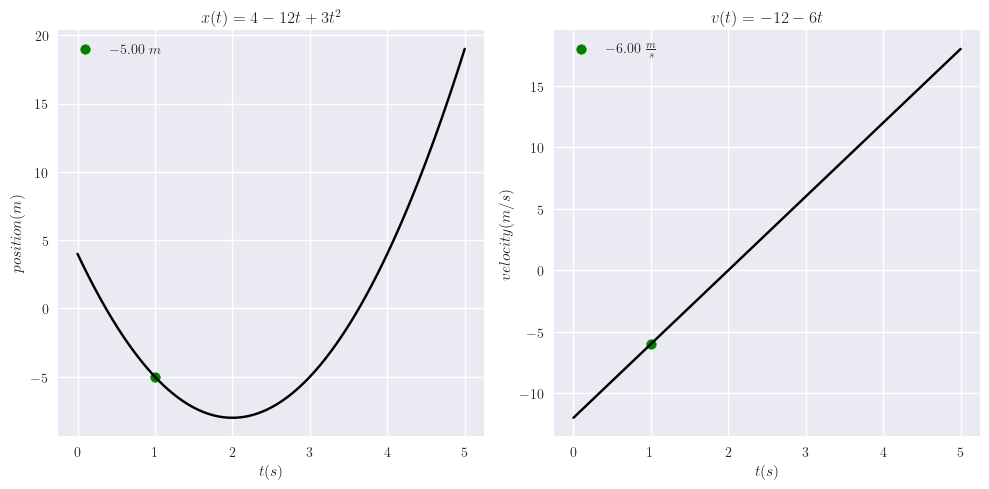

In [122]:
def x_15(t): return 4 - 12*t + 3*t**2
def v_15(t): return sp.diff(x_15(t),t)
def a_15(t): return sp.diff(v_15(t),t)

v_num15 = sp.lambdify(t, v_15(t), 'numpy')
a_num15 = sp.lambdify(t, a_15(t), 'numpy')

fig,ax = plt.subplots(1,2,figsize=(10,5))
T = np.linspace(0,5,100)

ax[0].plot(T, x_15(T), color='black')
ax[0].scatter(1, x_15(1), color='green', label=rf'$ {x_15(1):.2f} \ m $')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(rf'$x(t)= 4 - 12t + 3t^2$')
ax[0].grid(True)
ax[0].legend()

ax[1].plot(T, v_num15(T), color='black')
ax[1].scatter(1, v_num15(1), color='green', label=rf'$ {v_num15(1):.2f} \ \frac{{m}}{{s}} $')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(rf'$v(t)= -12-6t$')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()
plt.show()

$$ x(t) = 4 − 12t + 3t^2 $$
$$ v(t) = 6t - 12 $$
$$ a(t) = 0 $$

In [123]:
# answers values
print(f'(a): {v_num15(1)} m/s')
print(f'(b): negative position')
print(f'(c): {abs(v_num15(1))} m/s')
print(f'(d): increase')
print(f'(e): {sp.solve(v_15(t),t)[0]}s')

(a): -6 m/s
(b): negative position
(c): 6 m/s
(d): increase
(e): 2s


(e): no because $ \frac{dx(t)}{dt}: 6t-12 $ and in $v(t)=0$ have just one answer($t=2$).

so in $ t > 2 $ we don't have decreases velocity.

----------------------------------------------------------------------------------------

### 16
The position function $x(t)$ of a particle moving along an x axis is $x = 4.0 − 6.0t^2$, with $x$ in meters and $t$ in seconds.

(a) At what time and (b) where does the particle (momentarily) stop?
At what (c) negative time and (d) positive time does the particle pass through the origin?

(e) Graph $x$ versus $t$ for the range $−5 s$ to $+5 s$. (f) To shift the curve rightward on the graph, should we include the term $+20t$ or the term $−20t$ in $x(t)$?

(g) Does that inclusion increase or decrease the value of $x$ at which the particle momentarily stops?

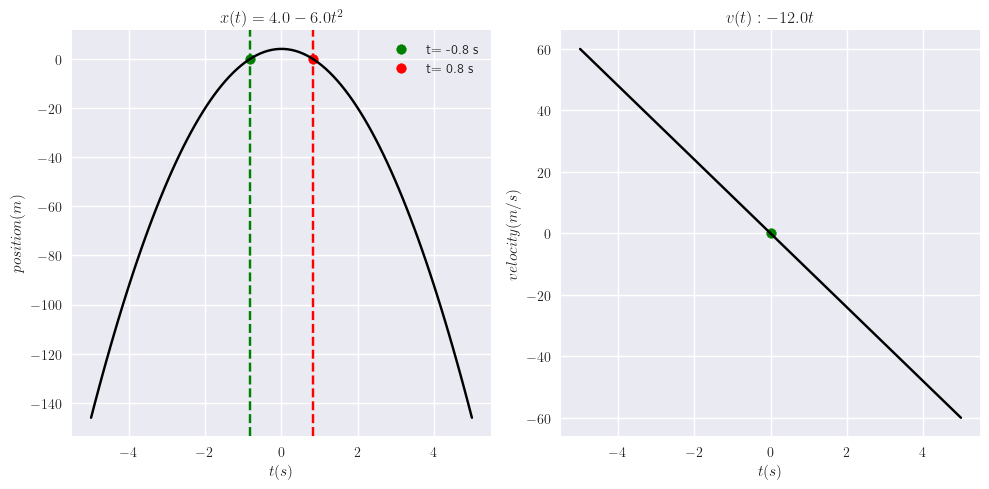

In [124]:
def x_16(t): return 4.0 - 6.0*t**2
def v_16(t): return sp.diff(x_16(t),t)
def a_16(t): return sp.diff(v_16(t),t)

v_num16 = sp.lambdify(t, v_16(t), 'numpy')
a_num16 = sp.lambdify(t, a_16(t), 'numpy')

fig,ax = plt.subplots(1,2,figsize=(10,5))

T = np.linspace(-5,5,100)

ax[0].axvline(sp.solve(x_16(t),t)[0],color='green', linestyle='dashed')
ax[0].axvline(sp.solve(x_16(t),t)[1],color='red', linestyle='dashed')
ax[0].scatter(sp.solve(x_16(t),t)[0],x_16(sp.solve(x_16(t),t)[0]),color='green',label=rf't= {sp.solve(x_16(t),t)[0]:.1f} s')
ax[0].scatter(sp.solve(x_16(t),t)[1],x_16(sp.solve(x_16(t),t)[1]),color='red',label=rf't= {sp.solve(x_16(t),t)[1]:.1f} s')
ax[0].plot(T,x_16(T),color='black')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(r'$x(t)= 4.0 - 6.0t^2$')
ax[0].legend()
ax[0].grid(True)

ax[1].scatter(sp.solve(v_16(t),t)[0],v_num16(sp.solve(v_16(t),t)[0]),color='green')
ax[1].plot(T,v_num16(T),color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(r'$v(t): -12.0t$')
ax[1].grid(True)

plt.tight_layout()

$$ x(t) = 4.0 − 6.0t^2 $$
$$ v(t) = -12.0t $$
$$ a(t) = -12.0 $$

In [125]:
print(f'(a): 0 s')
print(f'(b): 4.0 m')
print(f'(c): {sp.solve(x_16(t),t)[0]:.3f} s, {sp.solve(x_16(t),t)[1]:.3f} s')
print(f'(f): 20t')

(a): 0 s
(b): 4.0 m
(c): -0.816 s, 0.816 s
(f): 20t


(g): 
$$ x(t)_{new} = 4.0 - 6.0t^2 + 20 t $$
$$ x(0)_{new} = 4.0 m $$

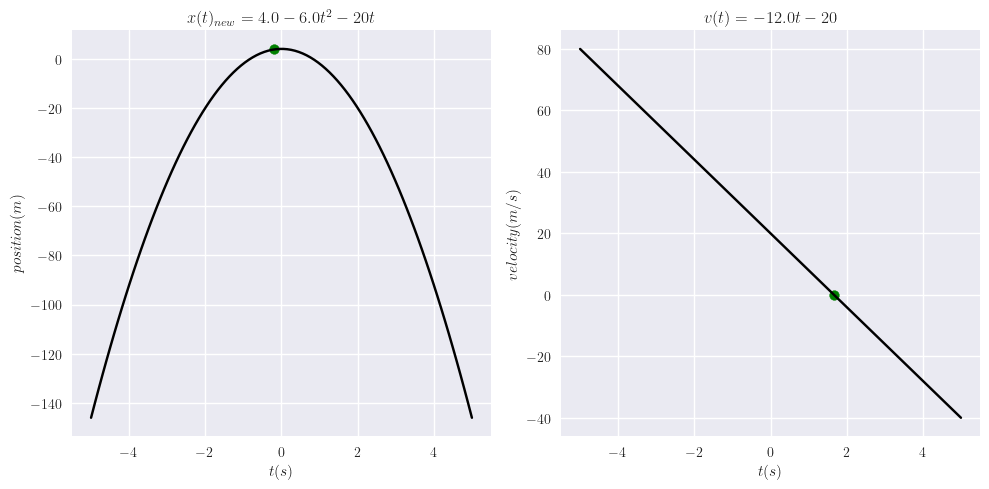

In [126]:
def x_16new(t) : return  x_16(t) + 20*t
def v_16new(t) : return sp.diff(x_16new(t),t)
def a_16new(t) : return sp.diff(v_16new(t),t)

v_num16new = sp.lambdify(t, v_16new(t),'numpy')
a_num16new = sp.lambdify(t, a_16new(t),'numpy')

fig,ax = plt.subplots(1,2,figsize=(10,5))

ax[0].scatter(sp.solve(x_16new(t),t)[0],x_num16(sp.solve(x_16new(t),t)[0]),color='green')
ax[0].plot(T, x_num16(T),color='black')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(r'$x(t)_{new} = 4.0 - 6.0t^2 - 20 t$')
ax[0].grid(True)

ax[1].scatter(sp.solve(v_16new(t),t)[0],v_num16new(sp.solve(v_16new(t),t)[0]),color='green')
ax[1].plot(T, v_num16new(T),color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(r'$v(t) = -12.0t - 20$')
ax[1].grid(True)

plt.tight_layout()

----------------------------------------------------------------------------------------

# 17

The position of a particle moving along the $x$ axis is given in centimeters by $x = 9.75 + 1.50t^3$, where t is in seconds.

Calculate (a) the average velocity during the time interval $t = 2.00 s$ to $t = 3.00 s$; 

(b) the instantaneous velocity at $t = 2.00 s$;

(c) the instantaneous velocity at $t = 3.00 s$; 

(d) the instantaneous velocity at $t = 2.50 s$; 

(e) the instantaneous velocity when the particle is midway between its positions at $t = 2.00 s$ and $t = 3.00 s$.

(f) Graph $x$ versus $t$ and indicate your answers graphically.

In [127]:
def x_17(t): return 9.75 + 1.5*t**3
def v_17(t): return sp.diff(x_17(t),t)
def a_17(t): return sp.diff(v_17(t),t)

v_num17 = sp.lambdify(t,v_17(t),'numpy')
a_num17 = sp.lambdify(t,a_17(t),'numpy')

(a):
$$ V_{avg} = \frac{\Delta x}{\Delta t} = \frac{x_f - x_i}{t_f - t_i} = \frac{x(3.00) - x(2.00)}{3.00 - 2.00}$$

In [128]:
print(x_17(3.00)-x_17(2.00) , 'cm/s')

28.5 cm/s


In [129]:
print(f'(a): {v_num17(2.00)} cm/s')
print(f'(b): {v_num17(3.00)} cm/s')
print(f'(c): {v_num17(2.50):.1f} cm/s')
d = (x_17(3.00) + x_17(2.00)) / 2
t_new = sp.solve(x_17(t) - 36,t)
print(f'(d): {v_num17(t_new[0]):.1f} cm/s')

(a): 18.0 cm/s
(b): 40.5 cm/s
(c): 28.1 cm/s
(d): 30.3 cm/s


$$ x(t)= 9.75 + 1.5t^3 $$
$$ v(t)= 4.5t^2 $$
$$ a(t)= 9.0t $$

(e):

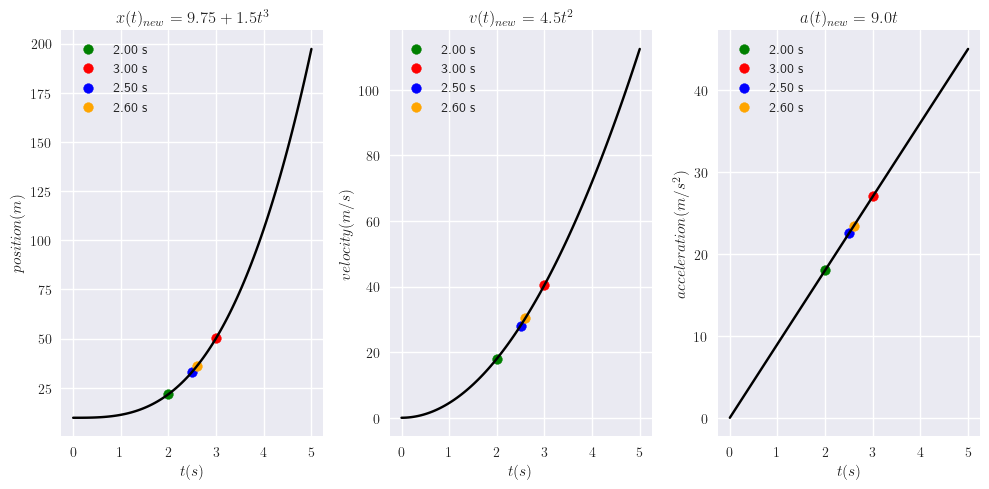

In [130]:
fig,ax = plt.subplots(1,3,figsize=(10,5))

T = np.linspace(0,5,100)

ax[0].scatter(2.00,x_17(2.00),color='green', label='2.00 s')
ax[0].scatter(3.00,x_17(3.00),color='red', label='3.00 s')
ax[0].scatter(2.50,x_17(2.50),color='blue', label='2.50 s')
ax[0].scatter(t_new[0],x_17(t_new[0]),color='orange',label=rf'{t_new[0]:.2f} s')
ax[0].plot(T, x_17(T),color='black')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(r'$x(t)_{new} = 9.75 + 1.5t^3$')
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(2.00,v_num17(2.00),color='green', label='2.00 s')
ax[1].scatter(3.00,v_num17(3.00),color='red', label='3.00 s')
ax[1].scatter(2.50,v_num17(2.50),color='blue', label='2.50 s')
ax[1].scatter(t_new[0],v_num17(t_new[0]),color='orange',label=rf'{t_new[0]:.2f} s')
ax[1].plot(T, v_num17(T),color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(r'$v(t)_{new} = 4.5t^2$')
ax[1].grid(True)
ax[1].legend()

ax[2].scatter(2.00,a_num17(2.00),color='green', label='2.00 s')
ax[2].scatter(3.00,a_num17(3.00),color='red', label='3.00 s')
ax[2].scatter(2.50,a_num17(2.50),color='blue', label='2.50 s')
ax[2].scatter(t_new[0],a_num17(t_new[0]),color='orange',label=rf'{t_new[0]:.2f} s')
ax[2].plot(T, a_num17(T),color='black')
ax[2].set_xlabel(r'$t(s)$')
ax[2].set_ylabel(r'$acceleration(m/s^2)$')
ax[2].set_title(r'$a(t)_{new} = 9.0t$')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()

----------------------------------------------------------------------------------------

# 18

The position of a particle moving along an $x$ axis is given by $x = 12t^2− 2t^3$, where $x$ is in meters and t is in seconds.
Determine (a) the position, (b) the velocity

(c) the acceleration of the particle at $t = 3.0 s$. 

(d) What is the maximum positive coordinate reached by the particle

(e) at what time is it reached?

(f) What is the maximum positive velocity reached by the particle

(g) at what time is it reached?

(h) What is the acceleration of the particle at the instant the particle is not moving (other than at $t = 0$)?

(i) Determine the average velocity of the particle between $t = 0$ and $t = 3 s$.

In [131]:
def x_18(t): return 12*t**2-2*t**3
def v_18(t): return sp.diff(x_18(t),t)
def a_18(t): return sp.diff(v_18(t),t)

v_num18 = sp.lambdify(t,v_18(t),'numpy')
a_num18 = sp.lambdify(t,a_18(t),'numpy')

$$ x(t)= 12t^2-2t^3 $$
$$ v(t)= 24t-6t^2 $$
$$ a(t)= 24-12t $$

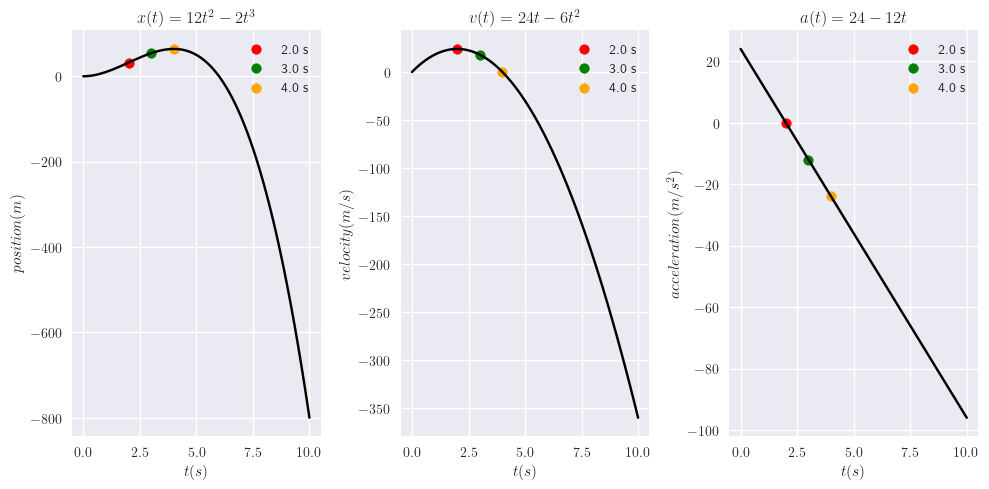

In [132]:
fig,ax = plt.subplots(1,3,figsize=(10,5))

T = np.linspace(0,10,100)

ax[0].scatter(2.0,x_18(2.0),color='red', label='2.0 s')
ax[0].scatter(3.0,x_18(3.0),color='green', label='3.0 s')
ax[0].scatter(4.0,x_18(4.0),color='orange', label='4.0 s')
ax[0].plot(T, x_18(T),color='black')
ax[0].set_xlabel(r'$t(s)$')
ax[0].set_ylabel(r'$position(m)$')
ax[0].set_title(r'$x(t) = 12t^2-2t^3$')
ax[0].grid(True)
ax[0].legend()

ax[1].scatter(2.0,v_num18(2.0),color='red', label='2.0 s')
ax[1].scatter(3.0,v_num18(3.0),color='green', label='3.0 s')
ax[1].scatter(4.0,v_num18(4.0),color='orange',label='4.0 s')
ax[1].plot(T, v_num18(T),color='black')
ax[1].set_xlabel(r'$t(s)$')
ax[1].set_ylabel(r'$velocity(m/s)$')
ax[1].set_title(r'$v(t) = 24t-6t^2$')
ax[1].grid(True)
ax[1].legend()

ax[2].scatter(2.0,a_num18(2.0),color='red', label='2.0 s')
ax[2].scatter(3.0,a_num18(3.0),color='green', label='3.0 s')
ax[2].scatter(4.0,a_num18(4.0),color='orange', label='4.0 s')
ax[2].plot(T, a_num18(T),color='black')
ax[2].set_xlabel(r'$t(s)$')
ax[2].set_ylabel(r'$acceleration(m/s^2)$')
ax[2].set_title(r'$a(t) = 24-12t$')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()

In [146]:
print(f'(a): x(3.0)= {x_18(3.0)} m')
print(f'(b): v(3.0)= {v_num18(3.0)} m/s')
print(f'(c): a(3.0)= {a_num18(3.0)} m/s^2')
print(f'(e): x(4.0)= {x_18(sp.solve(v_num18(t),t)[1])} m')
print(f'(f): {sp.solve(a_num18(t),t)[0]} s')
print(f'(g): {v_num18(sp.solve(a_num18(t),t)[0])} m/s')
print(f'(h): {a_num18(sp.solve(v_num18(t),t)[1])} m/s')
print(f'(i): {(x_18(3.0) - x_18(0)) / 3} m/s')

(a): x(3.0)= 54.0 m
(b): v(3.0)= 18.0 m/s
(c): a(3.0)= -12.0 m/s^2
(e): x(4.0)= 64 m
(f): 2 s
(g): 24 m/s
(h): -24 m/s
(i): 18.0 m/s


(i):
$$ V_{avg} = \frac{\Delta x}{\Delta t} = \frac{x_f - x_i}{t_f - t_i} = \frac{x(3.0) - x(0)}{3.0 - 0}$$

----------------------------------------------------------------------------------------

# 19

At a certain time a particle had a speed of $18 m/s$ in the positive $x$ direction, and $2.4 s$ later its speed was $30 m/s$ in the opposite direction. What is the average acceleration of the particle during this $2.4 s$ interval?